<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [3]:
#X

In [4]:
#y

In [5]:
#cali

In [6]:
price = pd.DataFrame({"price":cali.target})
price

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
cali_df = pd.DataFrame(data=cali.data, columns = cali.feature_names )
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
cali_df = cali_df.join(price)

In [9]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [10]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42)

In [13]:
X_train[0]

array([   4.2143    ,   37.        ,    5.28823529,    0.97352941,
        860.        ,    2.52941176,   33.81      , -118.12      ])

In [14]:
y_train[0]

2.285

In [15]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [61]:
model = Sequential()

In [62]:
X_train_sc.shape

(15480, 8)

In [63]:
# Input layer
model.add(Dense(32, activation="relu", input_shape = (8,)))

# Hidden layer
model.add(Dense(24, activation="relu"))

# Output layer
model.add(Dense(1,activation=None))

Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [64]:
# 2. Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [65]:
X_train.shape

(15480, 8)

In [66]:
X_train_sc.shape[1]

8

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                288       
                                                                 
 dense_29 (Dense)            (None, 24)                792       
                                                                 
 dense_30 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [68]:
# 3. Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    validation_data= (X_test_sc, y_test)
                   )

In [69]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                288       
                                                                 
 dense_29 (Dense)            (None, 24)                792       
                                                                 
 dense_30 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [70]:
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

162/162 [==============================] - 0s 1ms/step - loss: 66146.9766 - accuracy: 0.0021


In [71]:
base_preds = model.predict(X_test_sc).ravel()

162/162 [==============================] - 0s 992us/step


### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

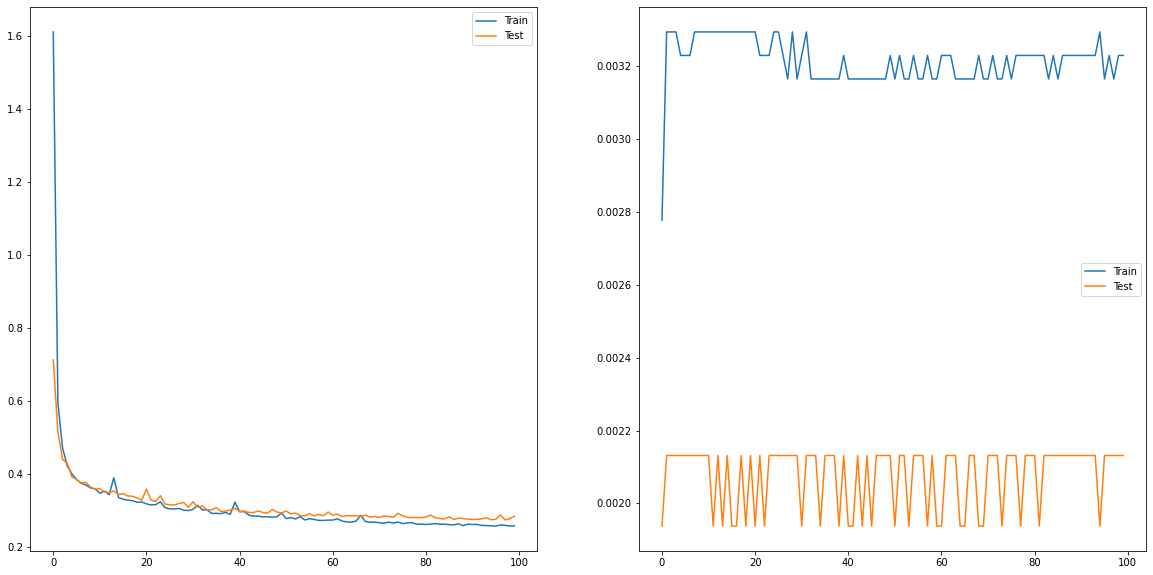

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Left plot
ax[0].plot(history.history["loss"], label = "Train") # Training Loss (Blue)
ax[0].plot(history.history["val_loss"], label = "Test") # Testing Loss (Orange)
ax[0].legend();

# y = log loss
# x = epochs

# Right plot
ax[1].plot(history.history["accuracy"], label = "Train") # Training accuracy (Blue)
ax[1].plot(history.history["val_accuracy"], label = "Test") # Testing accuracy (Orange)
ax[1].legend();

# y = accuracy
# x = epochs

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [27]:
# 1. Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [28]:
# 2. Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [29]:
# 3. Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    validation_data= (X_test_sc, y_test)
                   )

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,873
Trainable params: 17,873
Non-trainable params: 0
_________________________________________________________________


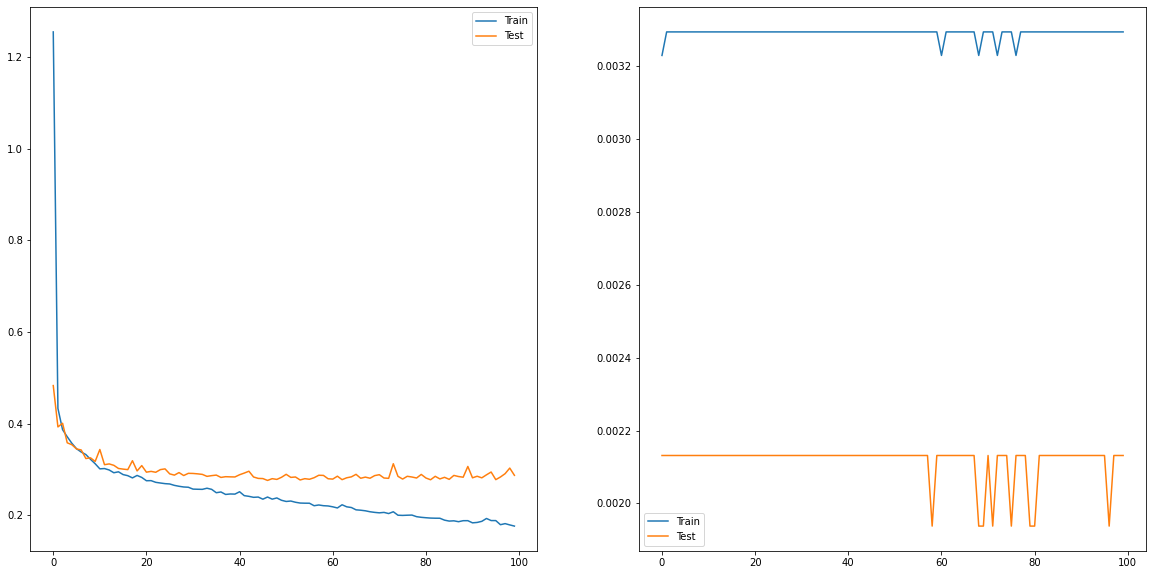

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Left plot
ax[0].plot(history.history["loss"], label = "Train") # Training Loss (Blue)
ax[0].plot(history.history["val_loss"], label = "Test") # Testing Loss (Orange)
ax[0].legend();

# y = log loss
# x = epochs

# Right plot
ax[1].plot(history.history["accuracy"], label = "Train") # Training accuracy (Blue)
ax[1].plot(history.history["val_accuracy"], label = "Test") # Testing accuracy (Orange)
ax[1].legend();

# y = accuracy
# x = epochs

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

In [32]:
# 1. Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
BatchNormalization()
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [33]:
# 2. Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [34]:
# 3. Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    validation_data= (X_test_sc, y_test)
                   )

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 64)                1088      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,873
Trainable params: 17,873
Non-trainable params: 0
_________________________________________________________________


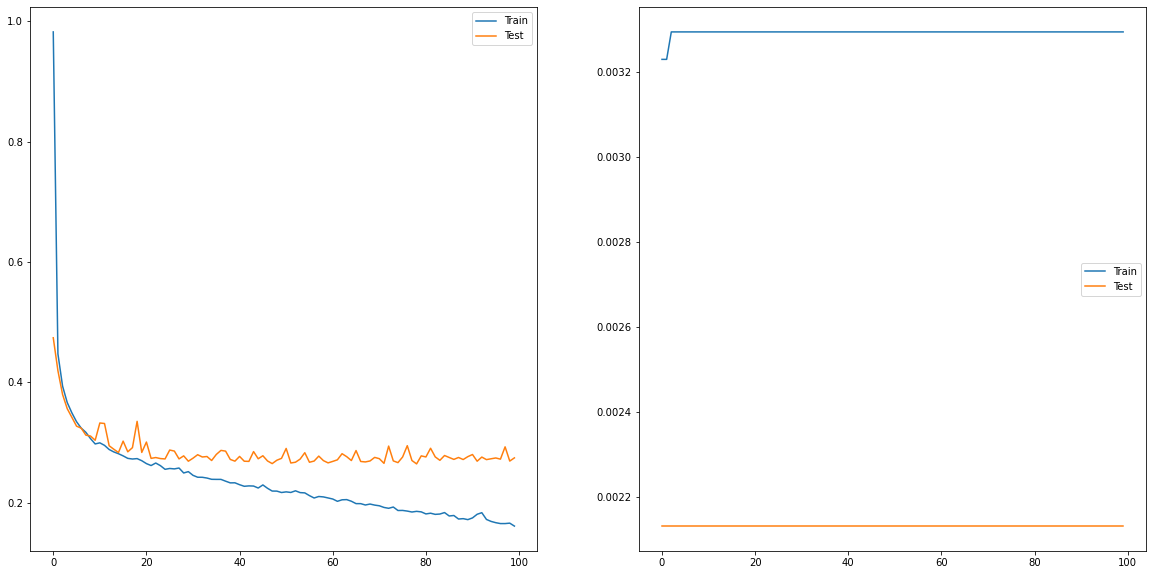

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Left plot
ax[0].plot(history.history["loss"], label = "Train") # Training Loss (Blue)
ax[0].plot(history.history["val_loss"], label = "Test") # Testing Loss (Orange)
ax[0].legend();

# y = log loss
# x = epochs

# Right plot
ax[1].plot(history.history["accuracy"], label = "Train") # Training accuracy (Blue)
ax[1].plot(history.history["val_accuracy"], label = "Test") # Testing accuracy (Orange)
ax[1].legend();

# y = accuracy
# x = epochs

##### Does this change anything?

In [37]:
# No it does not change anything

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [40]:
es = EarlyStopping(patience=5)

In [41]:
# 1. Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [42]:
# 2. Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [43]:
# 3. Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    callbacks = [es],
                    validation_data= (X_test_sc, y_test)
                   )

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                144       
                                                                 
 dense_19 (Dense)            (None, 64)                1088      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,873
Trainable params: 17,873
Non-trainable params: 0
_________________________________________________________________


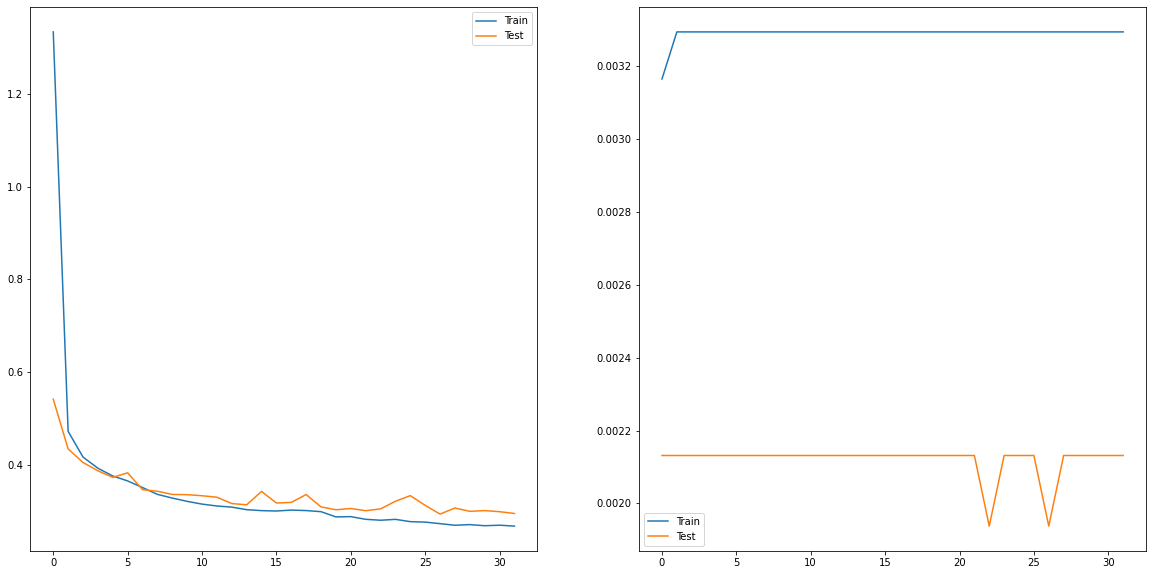

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Left plot
ax[0].plot(history.history["loss"], label = "Train") # Training Loss (Blue)
ax[0].plot(history.history["val_loss"], label = "Test") # Testing Loss (Orange)
ax[0].legend();

# y = log loss
# x = epochs

# Right plot
ax[1].plot(history.history["accuracy"], label = "Train") # Training accuracy (Blue)
ax[1].plot(history.history["val_accuracy"], label = "Test") # Testing accuracy (Orange)
ax[1].legend();

# y = accuracy
# x = epochs

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [73]:
# 1. Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [74]:
# 2. Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [75]:
# 3. Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    callbacks = [es],
                    validation_data= (X_test_sc, y_test)
                   )

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 16)                144       
                                                                 
 dense_32 (Dense)            (None, 64)                1088      
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 1)                

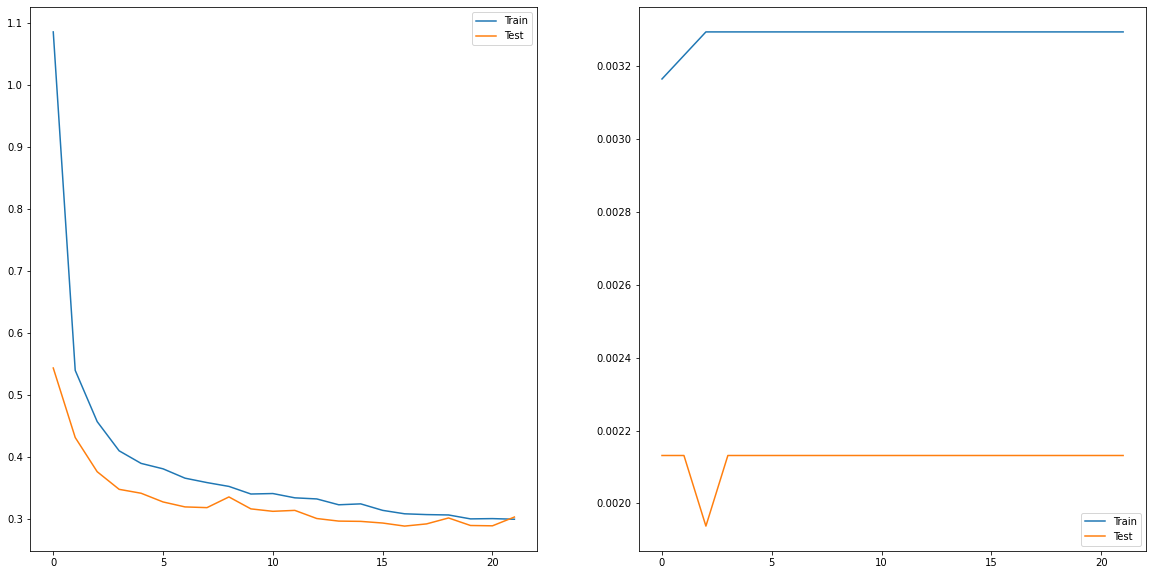

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Left plot
ax[0].plot(history.history["loss"], label = "Train") # Training Loss (Blue)
ax[0].plot(history.history["val_loss"], label = "Test") # Testing Loss (Orange)
ax[0].legend();

# y = log loss
# x = epochs

# Right plot
ax[1].plot(history.history["accuracy"], label = "Train") # Training accuracy (Blue)
ax[1].plot(history.history["val_accuracy"], label = "Test") # Testing accuracy (Orange)
ax[1].legend();

# y = accuracy
# x = epochs

In [78]:
best_preds = model.predict(X_test_sc).ravel()

162/162 [==============================] - 0s 1ms/step


### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [79]:
#best_preds

array([0.5620344, 1.1035519, 5.292505 , ..., 1.5231495, 2.5727262,
       4.2878633], dtype=float32)

In [80]:
#base_preds

array([0.4629293, 1.4253513, 4.8444724, ..., 1.4085691, 2.830494 ,
       4.570966 ], dtype=float32)

In [81]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 1.177  , 2.631  , 4.815  ])

In [85]:
print(f"Baseline MSE (100 epochs): {mean_squared_error(y_test, base_preds)}") # Baseline
print(f"Bestline MSE (~22 epochs): {mean_squared_error(y_test, best_preds)}") # Better Model in theory?

Baseline MSE (100 epochs): 0.2839790793298356
Bestline MSE (~22 epochs): 0.30394733720735634


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [86]:
# 1. Structure/topology
model = Sequential()

# Input layer
model.add(Dense(16, activation='relu', input_shape=(8,)))

# Hidden layers
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
          
# Outer layer - what activation would be appropriate
model.add(Dense(1, activation=None))

In [87]:
# 2. Compile
model.compile(loss="mse", optimizer = "adam", metrics = ["accuracy"])

In [88]:
# 3. Fit
history = model.fit(X_train_sc, y_train, epochs=100,
                    batch_size = 64,
                    verbose = 0,
                    callbacks = [es],
                    validation_data= (X_test_sc, y_test)
                   )

In [89]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                144       
                                                                 
 dense_37 (Dense)            (None, 64)                1088      
                                                                 
 dense_38 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 1)                

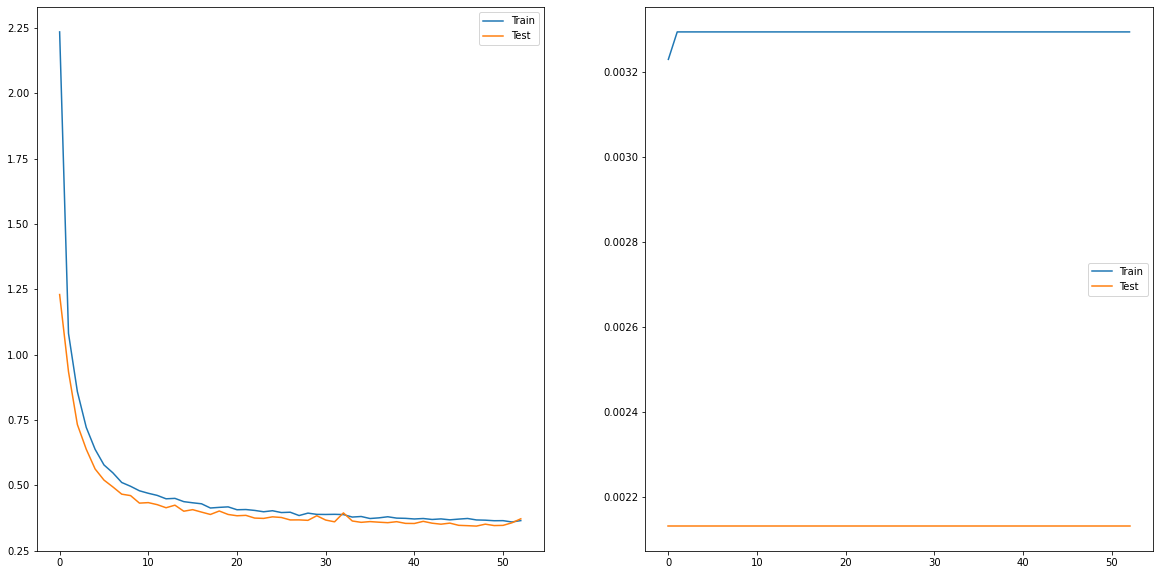

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Left plot
ax[0].plot(history.history["loss"], label = "Train") # Training Loss (Blue)
ax[0].plot(history.history["val_loss"], label = "Test") # Testing Loss (Orange)
ax[0].legend();

# y = log loss
# x = epochs

# Right plot
ax[1].plot(history.history["accuracy"], label = "Train") # Training accuracy (Blue)
ax[1].plot(history.history["val_accuracy"], label = "Test") # Testing accuracy (Orange)
ax[1].legend();

# y = accuracy
# x = epochs

In [92]:
reg_preds = model.predict(X_test_sc).ravel()

162/162 [==============================] - 0s 1ms/step


In [94]:
print(f"Baseline MSE (100 epochs): {mean_squared_error(y_test, base_preds)}") # Baseline
print(f"Bestline MSE (~22 epochs): {mean_squared_error(y_test, best_preds)}") # Better Model in theory?
print(f"Regularized MSE (~51 epochs): {mean_squared_error(y_test, reg_preds)}") # Regularized Model

Baseline MSE (100 epochs): 0.2839790793298356
Bestline MSE (~22 epochs): 0.30394733720735634
Regularized MSE (~22 epochs): 0.33473615648801636


### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [95]:
model.save('cali_housing.h5')

In [98]:
model2 = load_model('cali_housing.h5')

In [99]:
load_preds = model2.predict(X_test_sc).ravel()

162/162 [==============================] - 0s 1ms/step


In [101]:
print(f"Regularized MSE (~51 epochs): {mean_squared_error(y_test, reg_preds)}") # Regularized Model
print(f"Saved Model MSE (~51 epochs): {mean_squared_error(y_test, load_preds)}") # Regularized Model

Regularized MSE (~51 epochs): 0.33473615648801636
Saved Model MSE (~51 epochs): 0.33473615648801636
